In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\sreek\OneDrive\Desktop\ACM\insurance.csv")

# Basic information
print("Dataset Info:")
print(df.info())

# Preview data
print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

First 5 Rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
print({col: df[col].unique() for col in ['sex', 'smoker', 'region']})



Missing Values in Each Column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Unique Values in Categorical Columns:
{'sex': array(['female', 'male'], dtype=object), 'smoker': array(['yes', 'no'], dtype=object), 'region': array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)}


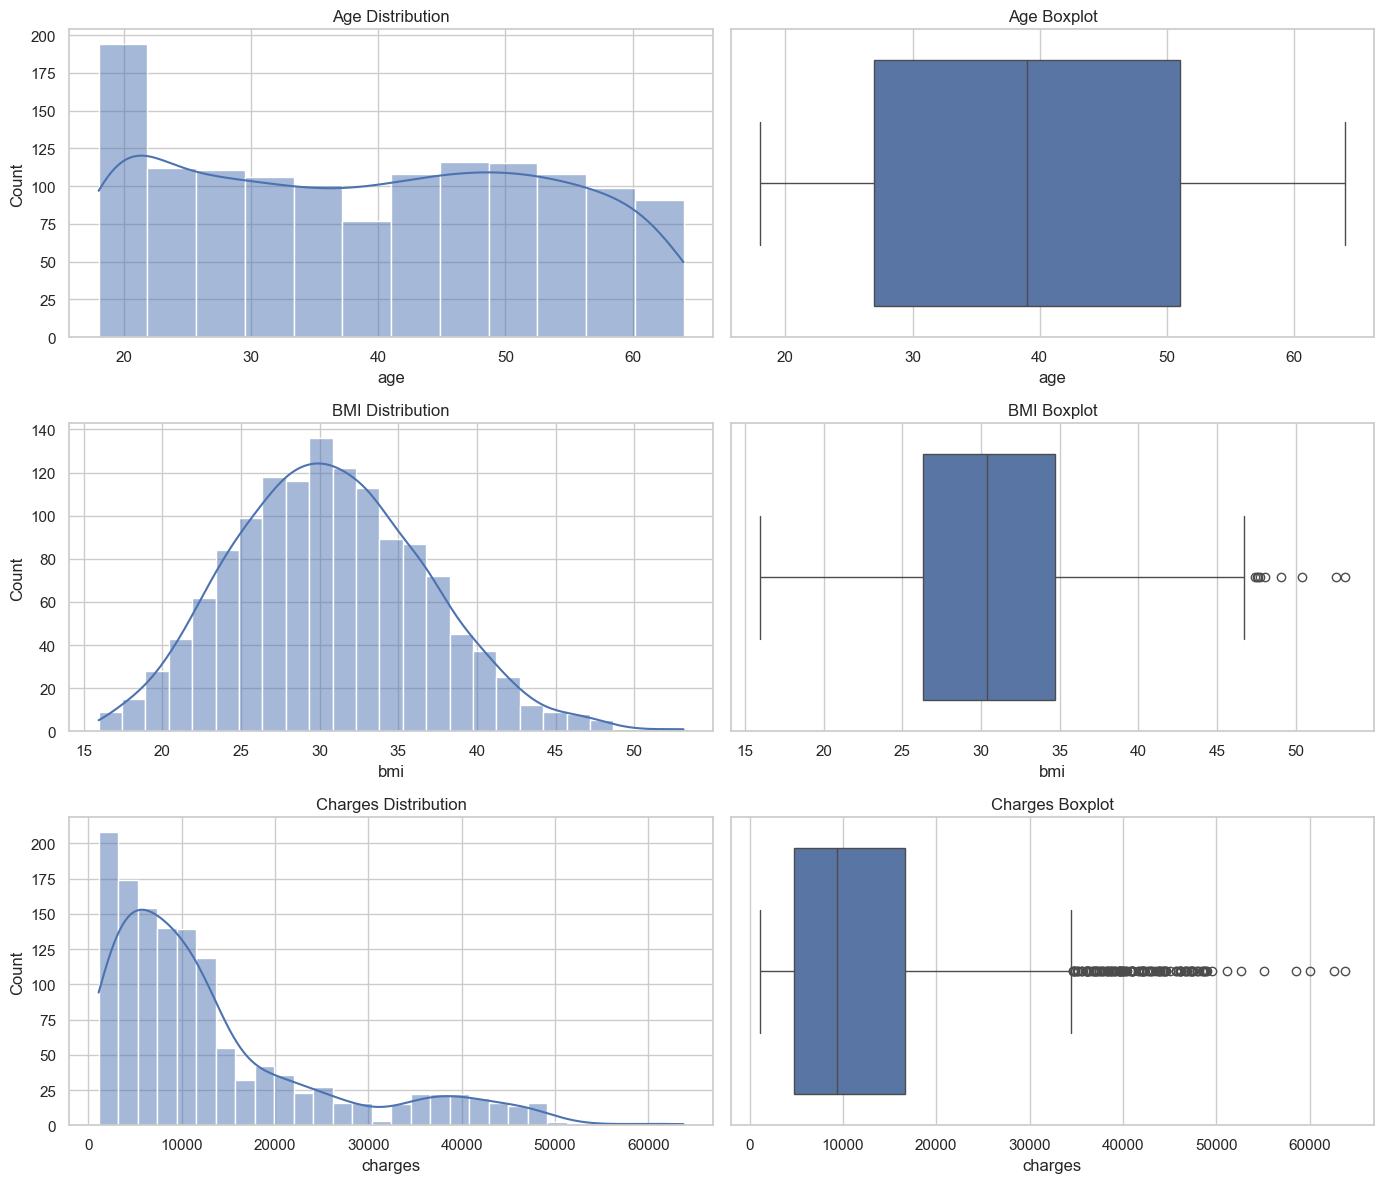

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create plots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Distributions
sns.histplot(df['age'], kde=True, ax=axes[0, 0]).set_title("Age Distribution")
sns.histplot(df['bmi'], kde=True, ax=axes[1, 0]).set_title("BMI Distribution")
sns.histplot(df['charges'], kde=True, ax=axes[2, 0]).set_title("Charges Distribution")

# Boxplots
sns.boxplot(x=df['age'], ax=axes[0, 1]).set_title("Age Boxplot")
sns.boxplot(x=df['bmi'], ax=axes[1, 1]).set_title("BMI Boxplot")
sns.boxplot(x=df['charges'], ax=axes[2, 1]).set_title("Charges Boxplot")

plt.tight_layout()
plt.show()


In [5]:
# Define target and features
X = df.drop('charges', axis=1)
y = df['charges']

print("\nFeatures and Target Set:")
print("X columns:", X.columns.tolist())
print("y name:", y.name)



Features and Target Set:
X columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
y name: charges


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Column types
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain-Test Split Done.")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")



Train-Test Split Done.
Training samples: 1070, Testing samples: 268


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Create model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train model
model.fit(X_train, y_train)

print("\nModel Training Complete.")



Model Training Complete.


In [9]:
from sklearn.metrics import r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate R²
baseline_r2 = r2_score(y_test, y_pred)
print(f"\nBaseline R² Score: {baseline_r2:.4f}")



Baseline R² Score: 0.7836


In [10]:
# Encode categorical variables manually (quick and dirty)
df_raw = pd.get_dummies(df, drop_first=True)

# Define X and y
X_raw = df_raw.drop('charges', axis=1)
y_raw = df_raw['charges']

# Split data
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# Train simple linear regression without scaling
raw_model = LinearRegression()
raw_model.fit(Xr_train, yr_train)

# Predict and evaluate
yr_pred = raw_model.predict(Xr_test)
raw_r2 = r2_score(yr_test, yr_pred)

print(f"🚫 Raw Model R² Score (Before Cleaning): {raw_r2:.4f}")


🚫 Raw Model R² Score (Before Cleaning): 0.7836


In [11]:
# Train cleaned model (already done earlier)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cleaned_r2 = r2_score(y_test, y_pred)

print(f"✅ Cleaned Model R² Score (After Cleaning): {cleaned_r2:.4f}")


✅ Cleaned Model R² Score (After Cleaning): 0.7836


In [12]:
print("\n📊 Final R² Comparison:")
print(f"Raw Model (No Cleaning):     R² = {raw_r2:.4f}")
print(f"Cleaned Model (Full Prep):   R² = {cleaned_r2:.4f}")



📊 Final R² Comparison:
Raw Model (No Cleaning):     R² = 0.7836
Cleaned Model (Full Prep):   R² = 0.7836
